In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from scipy.cluster.hierarchy import dendrogram

In [4]:
df = pd.read_csv('../mydata/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df = df.dropna()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


[]

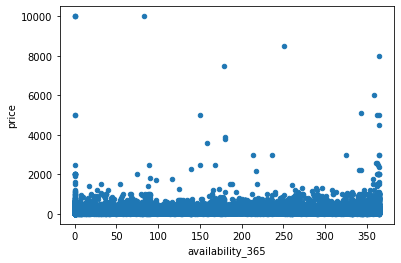

In [7]:
# 2D scatter plot
df.plot(x='availability_365', y="price", kind="scatter")
plt.plot()

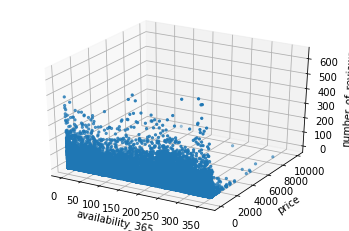

In [8]:
# 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df['availability_365'], df['price'], df['number_of_reviews'], marker='.')
ax.set_xlabel('availability_365')
ax.set_ylabel('price')
ax.set_zlabel('number_of_reviews')
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

titanic = pd.read_csv('../mydata/titanic_cleaned.csv')
X = titanic.drop('Survived', axis=1).values
y = titanic['Survived'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
def fit_knn(k_values = range(1,10)):

    for k in k_values:
        for weights in ['uniform', 'distance']:
            clf = KNeighborsClassifier(k, weights=weights)
            clf.fit(X_train, y_train)
            
            print(f'k:{k}, weights:{weights}, score: {clf.score(X_train, y_train)}')

In [11]:
fit_knn(range(1,200))

k:1, weights:uniform, score: 0.9873595505617978
k:1, weights:distance, score: 0.9873595505617978
k:2, weights:uniform, score: 0.8426966292134831
k:2, weights:distance, score: 0.9873595505617978
k:3, weights:uniform, score: 0.8412921348314607
k:3, weights:distance, score: 0.9873595505617978
k:4, weights:uniform, score: 0.8033707865168539
k:4, weights:distance, score: 0.9873595505617978
k:5, weights:uniform, score: 0.8047752808988764
k:5, weights:distance, score: 0.9873595505617978
k:6, weights:uniform, score: 0.7921348314606742
k:6, weights:distance, score: 0.9873595505617978
k:7, weights:uniform, score: 0.7907303370786517
k:7, weights:distance, score: 0.9873595505617978
k:8, weights:uniform, score: 0.7542134831460674
k:8, weights:distance, score: 0.9873595505617978
k:9, weights:uniform, score: 0.7598314606741573
k:9, weights:distance, score: 0.9873595505617978
k:10, weights:uniform, score: 0.7471910112359551
k:10, weights:distance, score: 0.9873595505617978
k:11, weights:uniform, score

k:88, weights:uniform, score: 0.6615168539325843
k:88, weights:distance, score: 0.9873595505617978
k:89, weights:uniform, score: 0.6615168539325843
k:89, weights:distance, score: 0.9873595505617978
k:90, weights:uniform, score: 0.6587078651685393
k:90, weights:distance, score: 0.9873595505617978
k:91, weights:uniform, score: 0.6573033707865169
k:91, weights:distance, score: 0.9873595505617978
k:92, weights:uniform, score: 0.6601123595505618
k:92, weights:distance, score: 0.9873595505617978
k:93, weights:uniform, score: 0.6601123595505618
k:93, weights:distance, score: 0.9873595505617978
k:94, weights:uniform, score: 0.6587078651685393
k:94, weights:distance, score: 0.9873595505617978
k:95, weights:uniform, score: 0.6601123595505618
k:95, weights:distance, score: 0.9873595505617978
k:96, weights:uniform, score: 0.6601123595505618
k:96, weights:distance, score: 0.9873595505617978
k:97, weights:uniform, score: 0.6587078651685393
k:97, weights:distance, score: 0.9873595505617978
k:98, weig

k:171, weights:distance, score: 0.9873595505617978
k:172, weights:uniform, score: 0.6629213483146067
k:172, weights:distance, score: 0.9873595505617978
k:173, weights:uniform, score: 0.6615168539325843
k:173, weights:distance, score: 0.9873595505617978
k:174, weights:uniform, score: 0.6615168539325843
k:174, weights:distance, score: 0.9873595505617978
k:175, weights:uniform, score: 0.6615168539325843
k:175, weights:distance, score: 0.9873595505617978
k:176, weights:uniform, score: 0.6615168539325843
k:176, weights:distance, score: 0.9873595505617978
k:177, weights:uniform, score: 0.6601123595505618
k:177, weights:distance, score: 0.9873595505617978
k:178, weights:uniform, score: 0.6601123595505618
k:178, weights:distance, score: 0.9873595505617978
k:179, weights:uniform, score: 0.6587078651685393
k:179, weights:distance, score: 0.9873595505617978
k:180, weights:uniform, score: 0.6587078651685393
k:180, weights:distance, score: 0.9873595505617978
k:181, weights:uniform, score: 0.6587078

In [19]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7374301675977654